In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from catboost import CatBoostRegressor, Pool

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline

In [3]:
data = pd.read_csv('all_cars_ml.csv')
data.head()

,amount,brand,model,generation,year,engine_capacity,engine_type,transmission_type,body_type,drive_type,color,mileage_km,condition
0,4400.0,Acura,TL,II · Рестайлинг,2002,3.2,бензин,автомат,седан,передний привод,чёрный,313821,с пробегом
1,7300.0,Acura,TL,III,2004,3.2,бензин,автомат,седан,передний привод,белый,230000,с пробегом
2,36900.0,Acura,RDX,III,2019,2.0,бензин,автомат,внедорожник 5 дв.,передний привод,чёрный,97500,с пробегом
3,11990.0,Acura,TSX,II,2010,2.4,бензин,автомат,седан,передний привод,серый,185074,с пробегом
4,13500.0,Acura,MDX,II,2008,3.7,бензин (пропан-бутан),автомат,внедорожник 5 дв.,постоянный полный привод,белый,270000,с пробегом


D:\Python\ml_pred_app\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


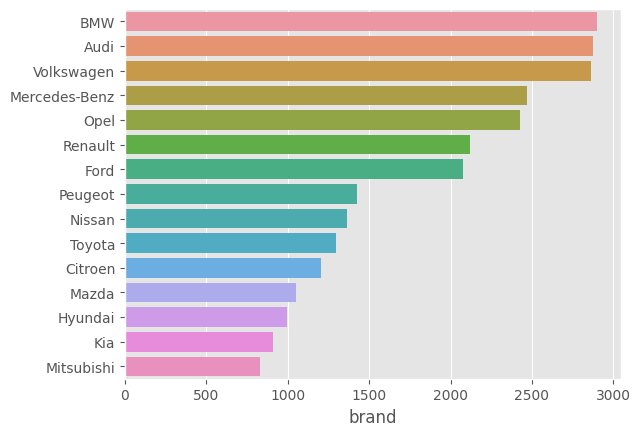

In [83]:
top_brand=data['brand'].value_counts()[:15]
sns.barplot(top_brand, top_brand.index)
plt.show()

D:\Python\ml_pred_app\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


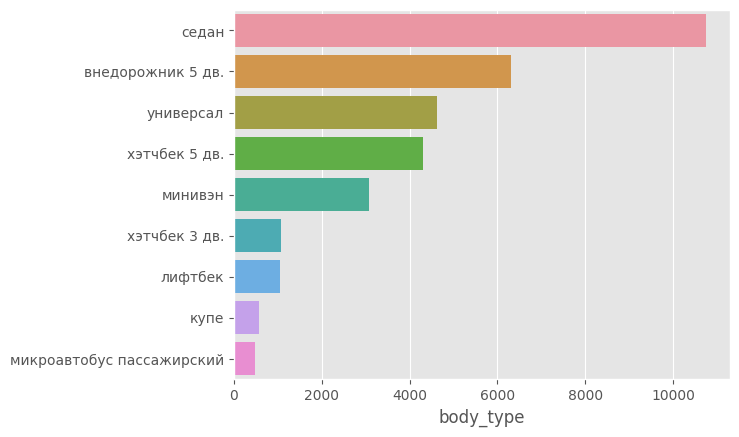

In [86]:
top_body=data['body_type'].value_counts()[:9]
sns.barplot(top_body, top_body.index)
plt.show()

D:\Python\ml_pred_app\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


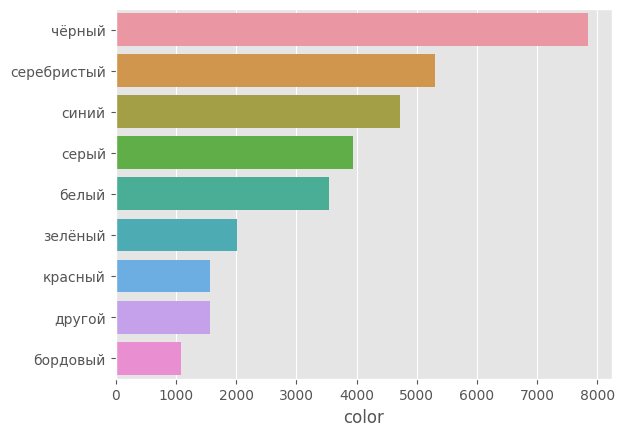

In [87]:
top_color=data['color'].value_counts()[:9]
sns.barplot(top_color, top_color.index)
plt.show()

<Figure size 1000x1500 with 0 Axes>

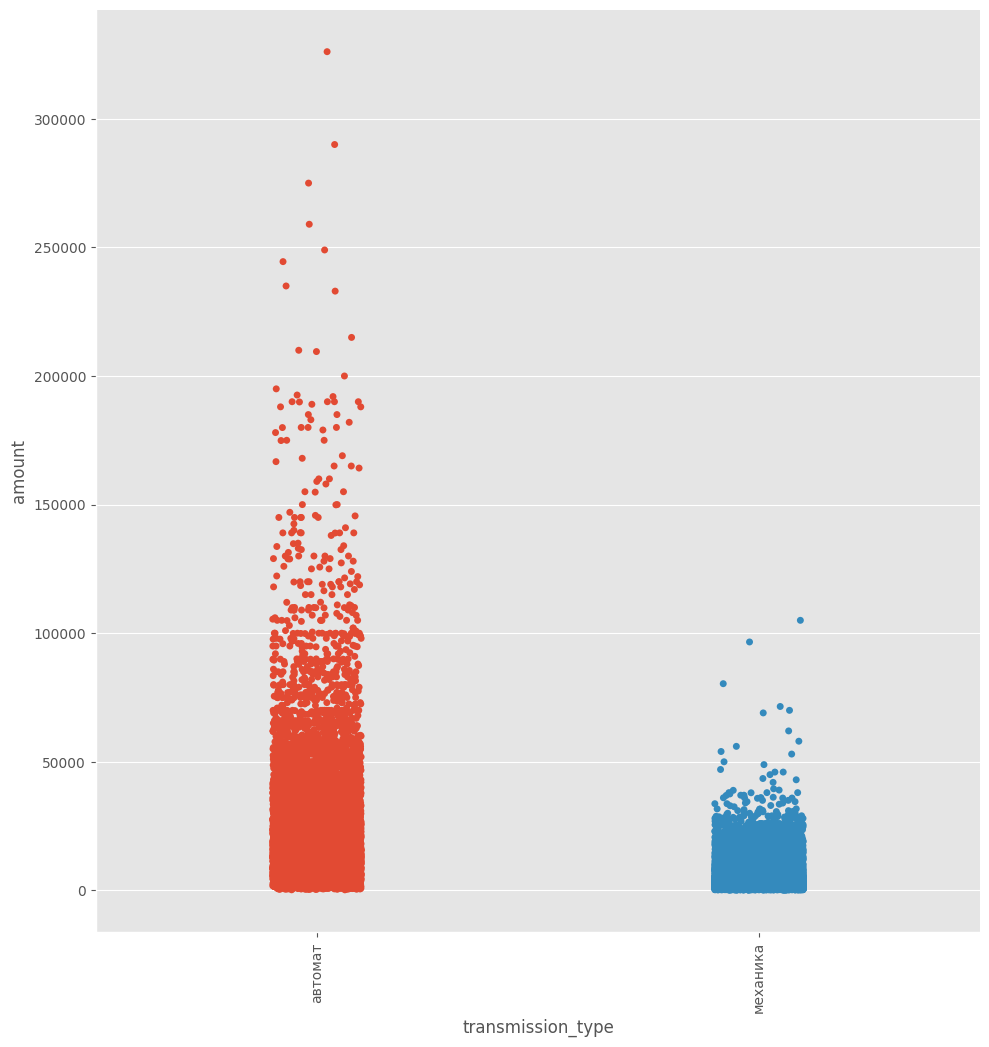

In [90]:
plt.figure(figsize=(10,15))
sns.catplot(x='transmission_type',y='amount',data=data, height=10, aspect=1)
month_lst = ['автомат', 'механика']
plt.gca().set_xticklabels(month_lst,rotation='90')
plt.show()

<Figure size 1000x1500 with 0 Axes>

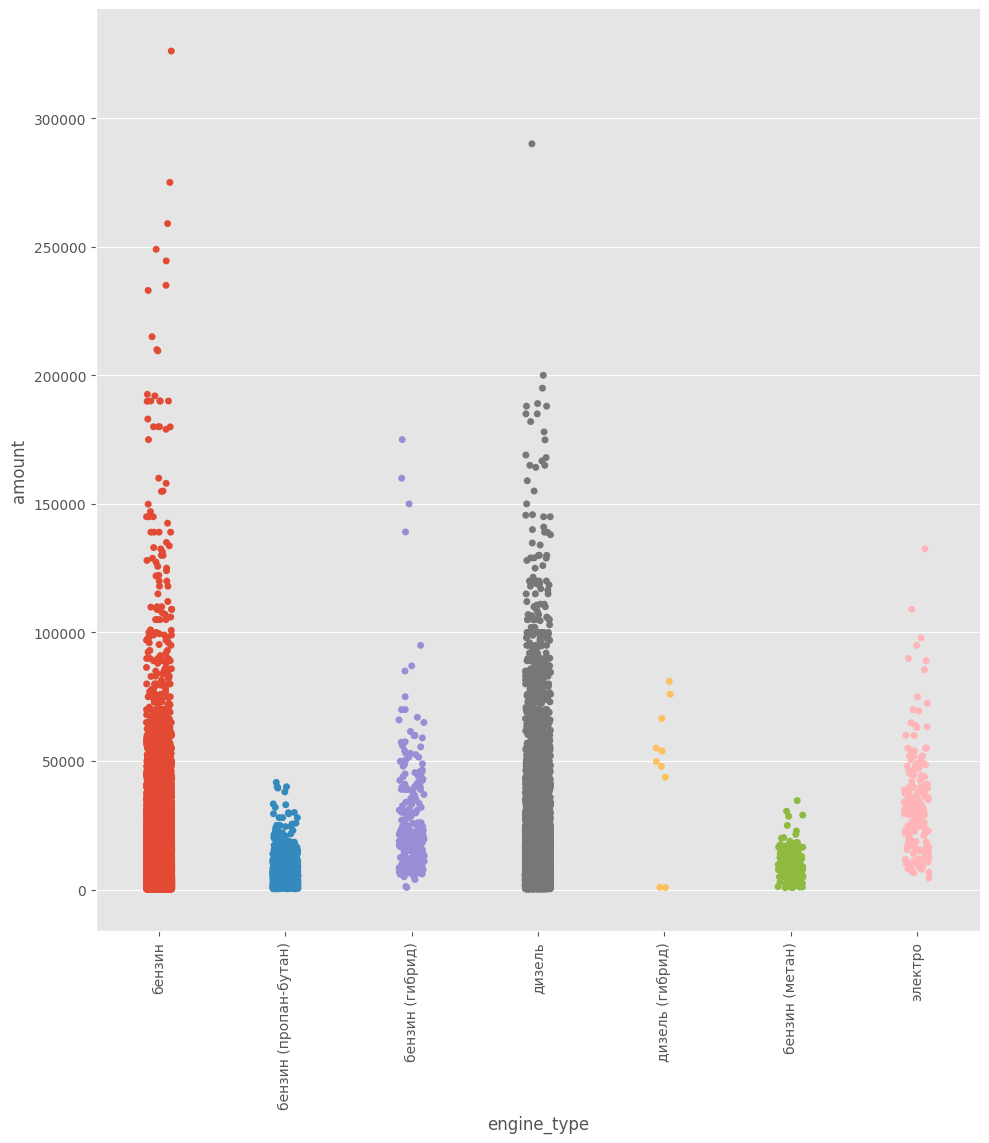

In [92]:
plt.figure(figsize=(10,15))
sns.catplot(x='engine_type',y='amount',data=data, height=10, aspect=1)
month_lst = ['бензин', 'бензин (пропан-бутан)', 'бензин (гибрид)', 'дизель',
             'дизель (гибрид)', 'бензин (метан)', 'электро']
plt.gca().set_xticklabels(month_lst,rotation='90')
plt.show()

<Figure size 1500x1200 with 0 Axes>

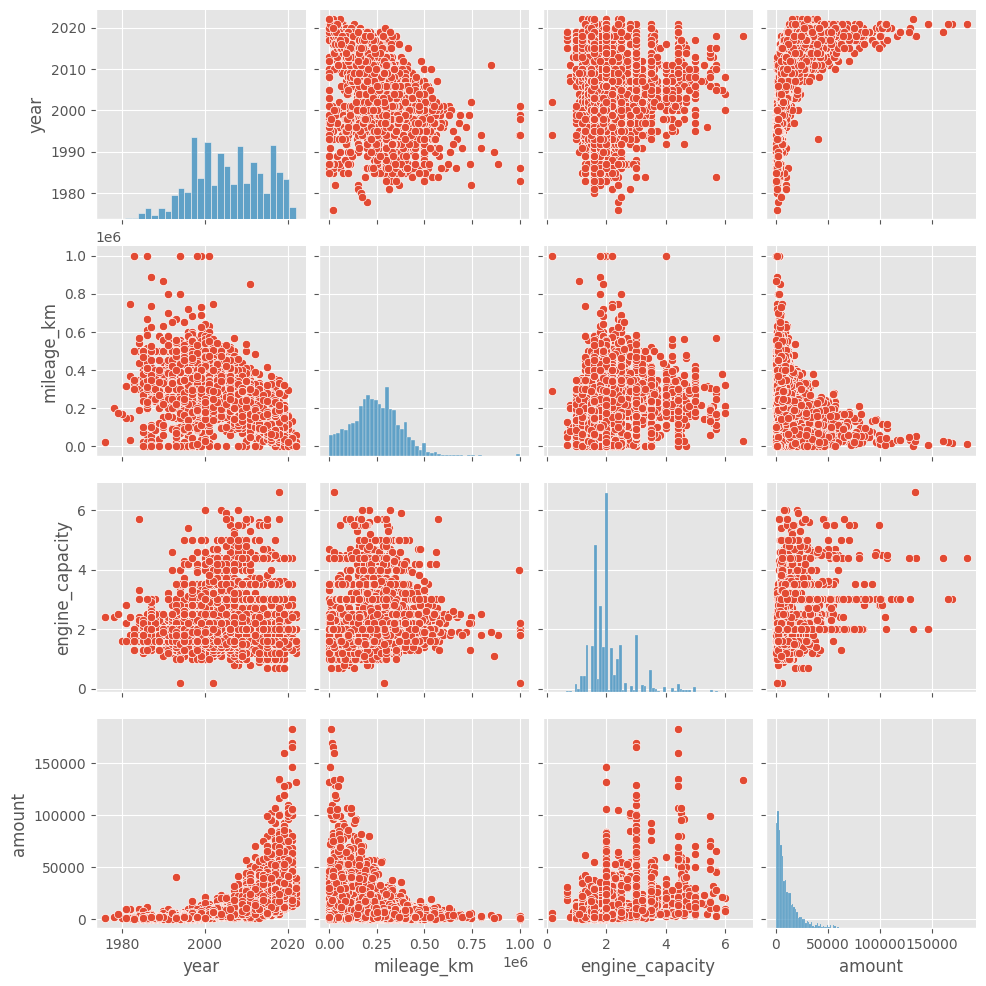

In [111]:
plt.figure(figsize=(15,12));
sns.pairplot(data[['year', 'mileage_km', 'engine_capacity'] + ['amount']].sample(5000));

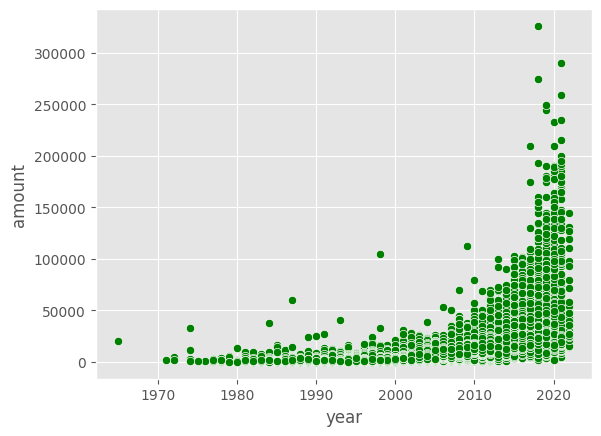

In [96]:
sns.scatterplot(x='year',y='amount',data=data, color='green')
plt.show()

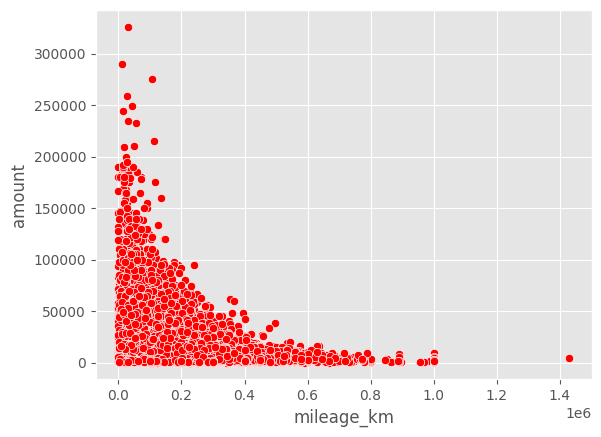

In [97]:
sns.scatterplot(x='mileage_km',y='amount',data=data, color='red')
plt.show()

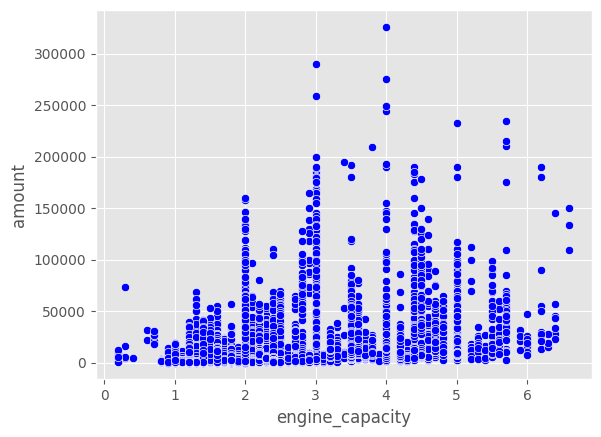

In [99]:
sns.scatterplot(x='engine_capacity',y='amount',data=data, color='blue')
plt.show()

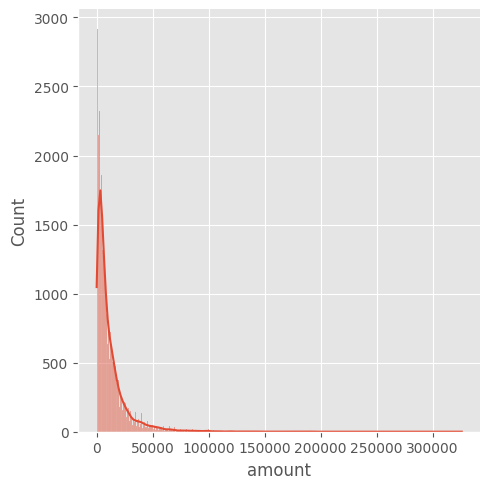

In [102]:
sns.displot(data['amount'], kde=True);

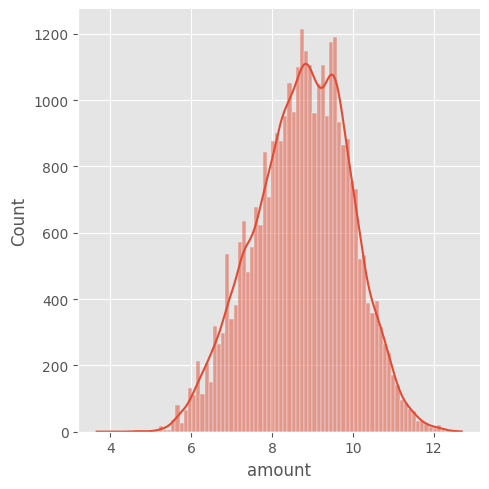

In [103]:
sns.displot(data['amount'].apply(lambda w: np.log(w)), kde=True);

In [55]:
def show_metrics(y_test, y_pred):
        print("Root Mean Squared Error = " + str(np.sqrt(mean_squared_error(y_test, y_pred))))
        print("Mean Absolute Error = " + str(mean_absolute_error(y_test, y_pred)))
        print("R^2 = " + str(r2_score(y_test, y_pred)))

In [14]:
X = data.drop('amount', axis=1)
y = data['amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [70]:
cat_features = ['brand', 'model', 'generation','engine_type','transmission_type','body_type','drive_type','color','condition']

model = CatBoostRegressor(loss_function = 'RMSE',
                          eval_metric = 'R2',
                          cat_features=cat_features,
                          iterations=3000,
                          learning_rate=0.1).fit(X_train, y_train)

pred = model.predict(X_test)
show_metrics(pred, y_test)

0:	learn: 0.1374685	total: 37.3ms	remaining: 1m 33s
1:	learn: 0.2555729	total: 70.8ms	remaining: 1m 28s
2:	learn: 0.3508361	total: 104ms	remaining: 1m 26s
3:	learn: 0.4283861	total: 138ms	remaining: 1m 25s
4:	learn: 0.4956682	total: 172ms	remaining: 1m 25s
5:	learn: 0.5527271	total: 223ms	remaining: 1m 32s
6:	learn: 0.5983257	total: 265ms	remaining: 1m 34s
7:	learn: 0.6381343	total: 309ms	remaining: 1m 36s
8:	learn: 0.6702001	total: 346ms	remaining: 1m 35s
9:	learn: 0.6995250	total: 383ms	remaining: 1m 35s
10:	learn: 0.7224340	total: 417ms	remaining: 1m 34s
11:	learn: 0.7417515	total: 448ms	remaining: 1m 32s
12:	learn: 0.7580839	total: 484ms	remaining: 1m 32s
13:	learn: 0.7719734	total: 524ms	remaining: 1m 32s
14:	learn: 0.7848748	total: 558ms	remaining: 1m 32s
15:	learn: 0.7963055	total: 591ms	remaining: 1m 31s
16:	learn: 0.8063224	total: 626ms	remaining: 1m 31s
17:	learn: 0.8145428	total: 656ms	remaining: 1m 30s
18:	learn: 0.8213740	total: 689ms	remaining: 1m 29s
19:	learn: 0.8284889

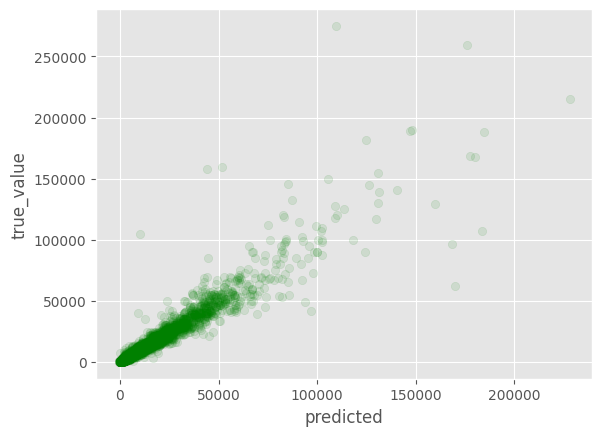

In [112]:
plt.scatter(pred, y_test, alpha=0.1, c="green");
plt.xlabel('predicted');
plt.ylabel('true_value');

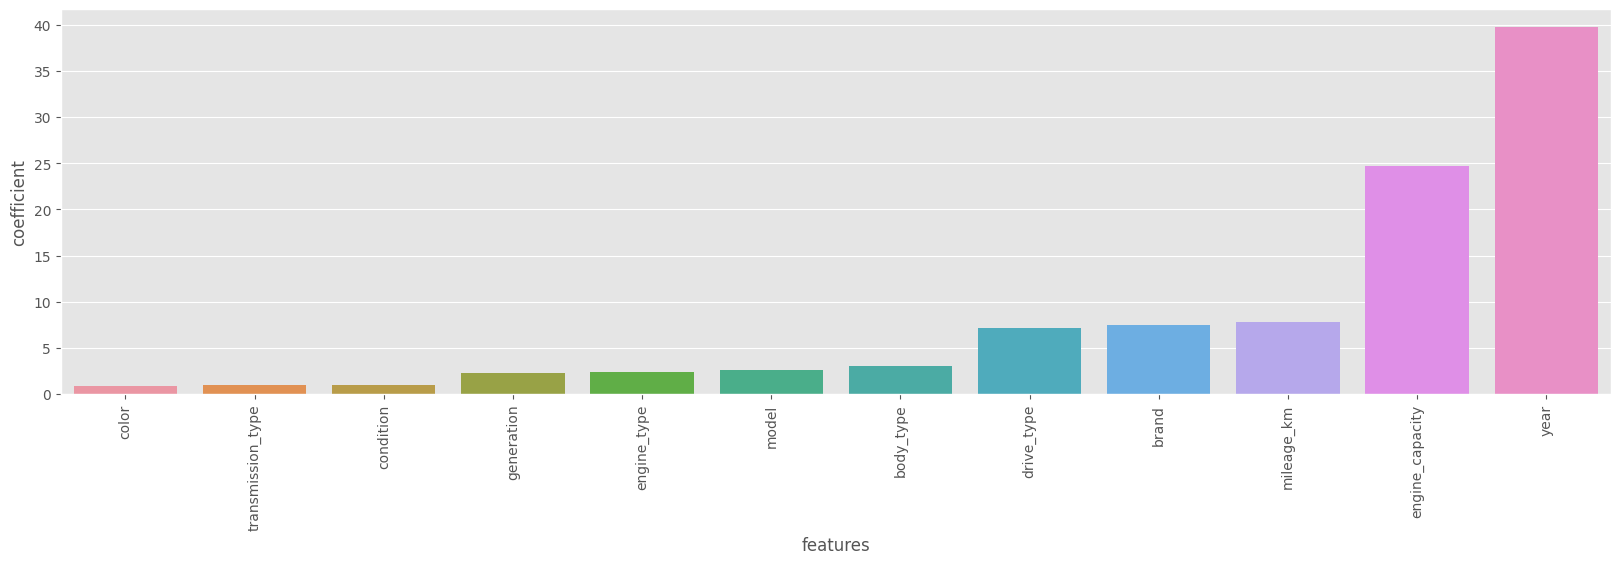

In [107]:
Feature_line = pd.DataFrame({'features': X_train.columns, 'coefficient':[i for i in list(model.feature_importances_)]}).sort_values('coefficient')
plt.figure(figsize=(20,5))
sns.barplot(data=Feature_line, x='features', y='coefficient')
plt.xticks(rotation=90)
plt.show()

In [72]:
model.save_model('catboost_regression',
           format="cbm",
           export_parameters=None,
           pool=None)